<a href="https://colab.research.google.com/github/Manisha021095/Manisha_INFO5731_Fall2022/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here

import os
import tweepy as tw
import pandas as pd
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
words = set(nltk.corpus.words.words())

def get_lemmatized_docs(X):
  stemmer = WordNetLemmatizer()
  eng_stop_word_list = stopwords.words("english")
  bag_of_words = []
  for sen in range(0, len(X)):
      # removing all the special characters
      document = re.sub(r'\W', ' ', str(X[sen]))

      # removing all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

      # removing multiple spaces and adding single space in place
      document = re.sub(r'\s+', ' ', document, flags=re.I)

      # removing the 'b' prefix added during byte conversion
      document = re.sub(r'^b\s+', '', document)

      # removing numbers
      document = re.sub(r'\d+','',document)

      # converting all words to lowercase
      document = document.lower()
      
      # Splitting the cleaned document into a list of words, which will be subsequently added to a bag after more processing
      document = document.split()
      document = [stemmer.lemmatize(word) for word in document]
      document = [word for word in document if word not in eng_stop_word_list]
      document = ' '.join(document)

      document = " ".join(word for word in nltk.wordpunct_tokenize(document) if word.lower() in words or not word.isalpha())

      #Bag of words
      bag_of_words.append(document)

  return bag_of_words

df = pd.read_csv('/content/drive/MyDrive/Nokia Reviews.csv')
#df.dropna(how='any', inplace=True)
clean_docs  = get_lemmatized_docs(df["Review"])
print(len(clean_docs))
print(clean_docs)

1000
['k price point come almost everything expect today time pro con according experienced pro great quality display thin bezel presence almost thin bezel change whole experience high resolution wildlife video wa amazed see detail colour sound front firing speaker could experience clear vocal tone dialogue read', 'must say best decision device feature loaded vision astonishing amazing picture quality vision intelligent speaker job perfectly steal deal guy assistant remote coming handy thanks quality seamless', 'product really amazed quick delivery next surprise come installation received message installation next day however got call day installation wa done perfection talk sleek compare led picture quality sound good speaker overall value money price range detailed review post lat read', 'pro picture quality good micro work well bass reflex sound better compare range k scaling good need minimum p video get better experience video super channel p work well without noise work well real

In [4]:
words = [word for word in clean_docs if str(word) != 'nan' and str(word) != '']
print(words)
word_list = []
for word in words:
  [word_list.append(val) for val in word.split(' ')]

word_str = ''
for word in word_list:
  word_str += word + ' '
print(word_str)

['k price point come almost everything expect today time pro con according experienced pro great quality display thin bezel presence almost thin bezel change whole experience high resolution wildlife video wa amazed see detail colour sound front firing speaker could experience clear vocal tone dialogue read', 'must say best decision device feature loaded vision astonishing amazing picture quality vision intelligent speaker job perfectly steal deal guy assistant remote coming handy thanks quality seamless', 'product really amazed quick delivery next surprise come installation received message installation next day however got call day installation wa done perfection talk sleek compare led picture quality sound good speaker overall value money price range detailed review post lat read', 'pro picture quality good micro work well bass reflex sound better compare range k scaling good need minimum p video get better experience video super channel p work well without noise work well really fe

In [5]:
import nltk
nltk.download('punkt')
token_list = nltk.word_tokenize(word_str)
res_trigrams = nltk.trigrams(token_list)
freq_trigrams = nltk.FreqDist(res_trigrams)
freq_trigrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FreqDist({('picture', 'quality', 'sound'): 31, ('picture', 'quality', 'good'): 31, ('picture', 'sound', 'quality'): 23, ('good', 'picture', 'quality'): 18, ('sound', 'picture', 'quality'): 15, ('screen', 'bleeding', 'issue'): 14, ('sound', 'quality', 'good'): 14, ('read', 'value', 'money'): 10, ('quality', 'sound', 'quality'): 10, ('quality', 'good', 'sound'): 10, ...})

In [6]:
from nltk.util import ngrams
import collections
token_bigram = nltk.word_tokenize(word_str)
bigrams = ngrams(token_bigram,2)
bigram_dist = nltk.FreqDist(bigrams)
single_word_dist = nltk.FreqDist([word for word in word_str.split(' ')])

for w1,w2 in bigram_dist:
  count_w1_w2 = bigram_dist[(w1,w2)]
  count_w1 = single_word_dist[w1]
  if(count_w1 != 0):
    print(w1,w2,(count_w1_w2/count_w1))

Streaming output truncated to the last 5000 lines.
body respond 0.25
respond blame 1.0
blame service 1.0
guy contractor 0.047619047619047616
contractor talk 1.0
talk like 0.3333333333333333
like higher 0.012048192771084338
higher official 0.3333333333333333
official none 1.0
none take 0.5
take responsibility 0.058823529411764705
responsibility answer 0.5
answer enquiry 0.5
enquiry please 1.0
please ever 0.03333333333333333
ever buy 0.06666666666666667
product suffer 0.0035842293906810036
suffer like 1.0
read trio 0.001996007984031936
trio different 1.0
different product 0.16666666666666666
sound warranty 0.0024449877750611247
warranty product 0.07142857142857142
thanks picture 0.023255813953488372
premium thing 0.07692307692307693
thing want 0.038461538461538464
want better 0.0625
better output 0.019230769230769232
channel watch 0.06666666666666667
watch program 0.1111111111111111
program k 1.0
got today 0.023809523809523808
today wa 0.1
within within 0.03125
within excellent 0.03125
s

In [7]:
from typing import AnyStr

from collections import Counter      
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Nokia Reviews.csv')

nltk.download('averaged_perceptron_tagger')
lower_case = word_str.lower()
word_tokens = nltk.word_tokenize(lower_case)
parts_of_speech_tags = nltk.pos_tag(word_tokens)

df.dropna(how='any', inplace=True)
cnts = Counter( tag for word,  tag in parts_of_speech_tags)
max_cnt = cnts['NN']
df['word groups'] = pos_tag_sents(df['Review'].apply(word_tokenize).tolist())


word_grps = df['word groups']
first = []
scnd = []
for grp in word_grps:
  cnt = Counter( tag for word,  tag in grp)
  first.append(cnt['NN'])
for val in first:
  rel_prob = val/max_cnt
  scnd.append(rel_prob)
print(scnd)

df1 = pd.DataFrame(first,columns = ['noun_count'])
df2 = pd. DataFrame(scnd,columns = ['prob_noun'])
res = pd.concat([df1,df2], axis=1, sort=False)
res_frame = pd.concat([df,res], axis = 1, sort = False)
res_frame

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[0.0027420736932305054, 0.0022279348757497856, 0.003084832904884319, 0.0022279348757497856, 0.0027420736932305054, 0.003084832904884319, 0.004627249357326478, 0.0027420736932305054, 0.002399314481576692, 0.004970008568980291, 0.001713796058269066, 0.001713796058269066, 0.0027420736932305054, 0.0006855184233076263, 0.0013710368466152527, 0.002570694087403599, 0.002913453299057412, 0.002570694087403599, 0.001713796058269066, 0.0015424164524421595, 0.001199657240788346, 0.002056555269922879, 0.0010282776349614395, 0.003941730934018852, 0.000856898029134533, 0.002913453299057412, 0.0015424164524421595, 0.003427592116538132, 0.004113110539845758, 0.002570694087403599, 0.0015424164524421595, 0.003084832904884319, 0.001199657240788346, 0.0015424164524421595, 0.0035989717223650387, 0.0010282776349614395, 0.0013710368466152527, 0.002056555269922879, 0.0022279348757497856, 0.0010282776349614395, 0.0027420736932305054, 0.0010282776349614395, 0.00017137960582690659, 0.002056555269922879, 0.0022279

,Glimpse of Review,Review,word groups,noun_count,prob_noun
0,Review from Technology Gyan: Almost everything...,"This 55"" 4K Nokia TV at this price point comes...","[(This, DT), (55, CD), ('', ''), (4K, CD), (No...",16,0.002742
1,Brilliant,I must say it is best decision to by Nokia TV....,"[(I, PRP), (must, MD), (say, VB), (it, PRP), (...",13,0.002228
2,Best in the market!,Flipcart delivered the Product in less than 24...,"[(Flipcart, RB), (delivered, VBN), (the, DT), ...",18,0.003085
3,Pretty good,"Pros1) Picture Quality is good, micro dimming ...","[(Pros1, NNP), (), )), (Picture, NNP), (Qualit...",13,0.002228
4,Terrific purchase,Value for money ....1) This tv has Everything ...,"[(Value, NNP), (for, IN), (money, NN), (...., ...",16,0.002742
...,...,...,...,...,...
995,Perfect product!,I have reviewed ofter using 30 days. Tv is rea...,"[(I, PRP), (have, VBP), (reviewed, VBN), (ofte...",4,0.000686
996,"Classy product ,Good","very good TV, Everything fine. Go for it.READ ...","[(very, RB), (good, JJ), (TV, NN), (,, ,), (Ev...",2,0.000343
997,Wonderful,The product does well for a budget TV.Good pic...,"[(The, DT), (product, NN), (does, VBZ), (well,...",7,0.001200
998,Not good,No thanksREAD MORE,"[(No, DT), (thanksREAD, NN), (MORE, JJR)]",1,0.000171


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [8]:
# Write your code here

from sklearn.feature_extraction.text import TfidfVectorizer
text = []
for x in df['Review']:
  text.append(x)
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(text)
attributes = vectorizer.get_feature_names()
index=[n for n in range(1, len(text)+1)]
vectorizer = TfidfVectorizer(input=text, min_df=0.1, stop_words='english')
tf_idf=pd.DataFrame(tf_idf_matrix.T.todense(), index=attributes, columns=index)
tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
06,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100mbps,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youtube,0.107038,0.0,0.0,0.0,0.221823,0.0,0.11419,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yrs,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yu,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zee5,0.000000,0.0,0.0,0.0,0.161209,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
query = "Take these reviews with a pinch of salt."
cleaned_query = get_lemmatized_docs([query])
print(cleaned_query[0])

In [10]:
#cosine similarity
from nltk import corpus
import pandas
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
text = []
for x in df['Review']:
  text.append(x)

text.append(cleaned_query[0])
vectorizer = TfidfVectorizer(input=text, min_df=0.1, stop_words='english')
matrix = vectorizer.fit_transform(text)

cs_dict = {}
for i in range(0, matrix.shape[0]):
  sim=cosine_similarity(matrix[80], matrix[i])
  cs_dict[str(i)] = sim[0][0]
  i+=1

sorted_keys = (sorted(cs_dict, key=cs_dict.get,reverse=True))
sorted_cosine_dict = {}
for key in sorted_keys:
  sorted_cosine_dict[key] = cs_dict[key];

Review = []
cos = []
for y in sorted_cosine_dict:
  text.append([int(y)])
  cos.append(sorted_cosine_dict[y])
dafrme1 = pd.DataFrame(Review)

dafrme1['Rank'] = [i for i in range(1, len(sorted_keys)+1)]
dafrme1['Cossim'] = cos
dafrme1.head(500)

,Rank,Cossim
0,1,1.000000
1,2,0.902676
2,3,0.900276
3,4,0.858091
4,5,0.853200
...,...,...
495,496,0.363731
496,497,0.363331
497,498,0.363331
498,499,0.362122


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [11]:
# Write your code here

!pip install --upgrade gensim

import gensim
from gensim import models

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
docs = [word.split() for word in clean_docs if str(word) != 'nan' and str(word) != '']
model = models.Word2Vec(docs,vector_size=300)
words = list(model.wv.index_to_key)
print(words)

['read', 'quality', 'good', 'sound', 'product', 'picture', 'awesome', 'best', 'wa', 'issue', 'money', 'screen', 'excellent', 'value', 'buy', 'installation', 'price', 'one', 'great', 'day', 'amazing', 'also', 'like', 'video', 'month', 'connectivity', 'go', 'time', 'service', 'nice', 'k', 'remote', 'bleeding', 'really', 'ha', 'delivery', 'worth', 'speaker', 'review', 'experience', 'display', 'need', 'problem', 'better', 'brand', 'range', 'look', 'working', 'everything', 'get', 'happy', 'thanks', 'overall', 'super', 'got', 'clarity', 'support', 'update', 'customer', 'led', 'superb', 'bad', 'work', 'smart', 'even', 'use', 'well', 'budget', 'within', 'inch', 'done', 'android', 'much', 'worst', 'audio', 'please', 'love', 'patch', 'pro', 'white', 'give', 'make', 'feature', 'perfect', 'performance', 'purchase', 'black', 'thank', 'year', 'without', 'first', 'thing', 'waste', 'home', 'big', 'satisfied', 'next', 'panel', 'every', 'feel', 'usage', 'wall', 'available', 'think', 'system', 'con', 'gu

In [14]:
model.wv.save_word2vec_format('model.bin')
#model.wv.save_word2vec_format('model.txt', binary=False)
model.save('model.bin')
print(model)

Word2Vec<vocab=431, vector_size=300, alpha=0.025>


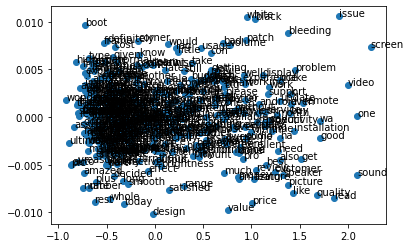

In [15]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [16]:
# The GitHub link of your final csv file



# Link: 
https://github.com/Manisha021095/Manisha_INFO5731_Fall2022/blob/main/Nokia%20Reviews.csv
